正在处理第1张图片
0.008088144254571385
PSNR: 20.993936449452836
PSNR cropped: 21.026587621263083
正在处理第2张图片
0.008125820317779113
PSNR: 21.02268553064267
PSNR cropped: 21.01406109907067
正在处理第3张图片
0.007325649499487566
PSNR: 20.869870378317877
PSNR cropped: 20.931095288986032
正在处理第4张图片
0.00808429912700278
PSNR: 20.889049184967106
PSNR cropped: 20.96206397546291
正在处理第5张图片
0.008106347249567873
PSNR: 20.93596401979111
PSNR cropped: 21.030189203960642
正在处理第6张图片
0.007861057474856081
PSNR: 20.975261813564643
PSNR cropped: 20.93557124459714
正在处理第7张图片
0.007827497386916104
PSNR: 20.865316606633073
PSNR cropped: 20.89538861031493
正在处理第8张图片
0.008099672198683
PSNR: 20.97208995736591
PSNR cropped: 20.82311099031675
正在处理第9张图片
0.008134512512380478
PSNR: 20.900521753640117
PSNR cropped: 20.91616438231686
正在处理第10张图片
0.008115256901397574
PSNR: 20.957332655220444
PSNR cropped: 20.982073547112993
正在处理第11张图片
0.008141785970465863
PSNR: 20.92984751223699
PSNR cropped: 20.80635605557233
正在处理第12张图片
0.007975311860354748
PS

PSNR: 21.106666705321878
PSNR cropped: 21.072408942482063
正在处理第36张图片
0.008025573073623667
PSNR: 20.880935161303967
PSNR cropped: 20.909059894671785
正在处理第37张图片
0.008281961315657357
PSNR: 20.933959496516792
PSNR cropped: 20.929571207108786
正在处理第38张图片
0.008762575279293703
PSNR: 20.91736459762089
PSNR cropped: 20.883062021806573
正在处理第39张图片
0.00807430071387236
PSNR: 20.893218453470315
PSNR cropped: 20.773566730624005
正在处理第40张图片
0.007805839867017818
PSNR: 20.94068047684948
PSNR cropped: 20.926851110637354
正在处理第41张图片
0.008681178622000928
PSNR: 20.926130750811673
PSNR cropped: 20.86062832200546
正在处理第42张图片
0.008047809570110812
PSNR: 20.986160969351047
PSNR cropped: 20.997708551351213
正在处理第43张图片
0.008161565982382553
PSNR: 20.904701307154802
PSNR cropped: 20.993627208670084
正在处理第44张图片
0.008211333708757705
PSNR: 20.95064415126075
PSNR cropped: 20.95043303675759
正在处理第45张图片
0.008460725276484815
PSNR: 20.880763631261736
PSNR cropped: 20.985854421643072
正在处理第46张图片
0.007938902062086235
PSNR: 20.8817356

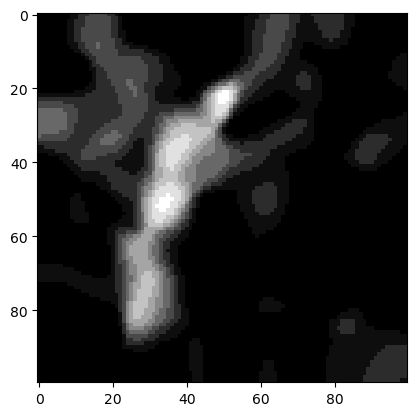

In [9]:
import bm3d_demo_grayscale
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 输入图片路径
source_folder = '/DATA/disk1/3dmodel/3dmodel/ISAR_NERF/asteroid_image_nerf_new/-5db'
target_folder = '/DATA/disk1/3dmodel/3dmodel/ISAR_NERF/asteroid_image_nerf_new/-5db_denoise_submean'


if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# 读取文件夹下npz文件,npz文件中有image和LOS和rotation_axis
npz_files = [f for f in os.listdir(source_folder) if f.endswith('.npz')]
for i,npz_file in zip(range(0,len(npz_files)),npz_files):
    # 显示程序进度
    print('正在处理第{}张图片'.format(i))
    source_path = os.path.join(source_folder, npz_file)
    target_path = os.path.join(target_folder, npz_file)
    data = np.load(source_path)
    image = data['image']
    denoise_image = bm3d_demo_grayscale.denosie(image)
    # 图片强度归一化
    denoise_image = (denoise_image - np.min(denoise_image)) / (np.max(denoise_image) - np.min(denoise_image))
    # 消除均值
    denoise_image = denoise_image - np.mean(denoise_image)
    # 将负值置为0
    denoise_image[denoise_image < 0] = 0
    np.savez(target_path, image=denoise_image, LOS=data['LOS'], rotation_axis=data['rotation_axis'])
    # 将图片变为png保存
    image_png = np.uint8(denoise_image * 255)
    cv2.imwrite(target_path.replace('.npz','.png'),image_png)
plt.imshow(image,cmap='gray')
plt.imshow(denoise_image,cmap='gray')

# png_files = [f for f in os.listdir(source_folder) if f.endswith('.png')]
# for png_file in png_files:
#     source_path = os.path.join(source_folder, png_file)
#     target_path = os.path.join(target_folder, png_file)
#     denoise_image = bm3d_demo_grayscale.denosie(source_path)
#     # plt.imshow(denoise_image,cmap='gray')
#     denoise_image.save(target_path,'PNG')